In [33]:
import Boost
import Kernel

In [34]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
import matplotlib.ticker as mtick

## Import Data

In [35]:
iono_df = pd.read_csv('Data/ionosphere.data',header=None)
iono_y = np.where(iono_df.iloc[:,-1]=='g',1,-1)
iono_y.shape = (iono_y.shape[0],1)
iono_X = np.array(iono_df.iloc[:, 2:-1 ]) # might want to include first column too
lambda_val_list = [0.001,0.01,0.1,1,10]

## Kernel Boost

In [36]:
processing_summary = []
for lambda_val in lambda_val_list:
    for nu_val in np.linspace(1,10,19):
        accuracy_summay = []
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_idx, test_idx in kfold.split(iono_X):
            train_X, test_X = iono_X[train_idx], iono_X[test_idx]
            train_y, test_y = iono_y[train_idx], iono_y[test_idx]
            ss_transform = StandardScaler()
            ss_transform.fit(train_X)
            train_X_ss = ss_transform.transform(train_X)
            test_X_ss = ss_transform.transform(test_X)
            iono_kb = Boost.KernelBoost(Kernel.Gaussian_Kernel, 'hinge', lambda_val, nu_val)
            iono_kb.fit(train_X_ss, train_y)
            accuracy_summay.append(accuracy_score(test_y, np.sign(iono_kb.predict(test_X_ss)).flatten()))
        mean_accuracy = np.mean(accuracy_summay)
        print('lambda=',lambda_val,'nu=',nu_val,'accuracy=',np.mean(mean_accuracy))
        processing_summary.append(
        {'lambda_val':lambda_val, 'nu_val':nu_val,'accuracy':mean_accuracy}
        )

lambda= 0.001 nu= 1.0 accuracy= 0.8746076458752515
lambda= 0.001 nu= 1.5 accuracy= 0.8746076458752515
lambda= 0.001 nu= 2.0 accuracy= 0.8746076458752515
lambda= 0.001 nu= 2.5 accuracy= 0.8746076458752515
lambda= 0.001 nu= 3.0 accuracy= 0.8746076458752515
lambda= 0.001 nu= 3.5 accuracy= 0.8746076458752515
lambda= 0.001 nu= 4.0 accuracy= 0.8746076458752515
lambda= 0.001 nu= 4.5 accuracy= 0.8746076458752515
lambda= 0.001 nu= 5.0 accuracy= 0.8746076458752515
lambda= 0.001 nu= 5.5 accuracy= 0.8746076458752515
lambda= 0.001 nu= 6.0 accuracy= 0.8746076458752515
lambda= 0.001 nu= 6.5 accuracy= 0.8774647887323944
lambda= 0.001 nu= 7.0 accuracy= 0.8746076458752515
lambda= 0.001 nu= 7.5 accuracy= 0.8746076458752515
lambda= 0.001 nu= 8.0 accuracy= 0.8746076458752515
lambda= 0.001 nu= 8.5 accuracy= 0.8746076458752515
lambda= 0.001 nu= 9.0 accuracy= 0.8746076458752515
lambda= 0.001 nu= 9.5 accuracy= 0.8746076458752515
lambda= 0.001 nu= 10.0 accuracy= 0.8746076458752515
lambda= 0.01 nu= 1.0 accuracy=

/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


lambda= 1 nu= 6.0 accuracy= 0.8860764587525152


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 6.5 accuracy= 0.8803621730382295


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 7.0 accuracy= 0.8803621730382295


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 7.5 accuracy= 0.8746881287726358


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 8.0 accuracy= 0.8774647887323944


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 8.5 accuracy= 0.8774647887323944


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 9.0 accuracy= 0.8746076458752515


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 9.5 accuracy= 0.8490543259557345


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 10.0 accuracy= 0.8547283702213277
lambda= 10 nu= 1.0 accuracy= 0.8832193158953723
lambda= 10 nu= 1.5 accuracy= 0.8832193158953723
lambda= 10 nu= 2.0 accuracy= 0.8832193158953723
lambda= 10 nu= 2.5 accuracy= 0.8945674044265595
lambda= 10 nu= 3.0 accuracy= 0.886036217303823
lambda= 10 nu= 3.5 accuracy= 0.8803621730382295


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


lambda= 10 nu= 4.0 accuracy= 0.8832193158953723


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 4.5 accuracy= 0.8775452716297787


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 5.0 accuracy= 0.8775452716297787


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 5.5 accuracy= 0.8803219315895372


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 6.0 accuracy= 0.8803219315895372


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 6.5 accuracy= 0.8717907444668009


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
Sum(maximum(Promote(1.0, (280, 1)) + -[[ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]] @ [[3.47600389e+10 9.17425319e+04 9.79793552e+11 ... 8.63267049e+12
  7.53998003e+12 6.08663036e+12]
 [9.17425319e+04 1.94875867e+07 1.93012541e+06 ... 1.38939600e+07
  1.22825975e+07 1.06173086e+07]
 [9.79793552e+11 1.93012541e+06 2.82974949e+13 ... 2.51313616e+14
  2.19276504e+14 1.76754604e+14]
 ...
 [8.63267049e+12 1.38939600e+07 2.51313616e+14 ... 2.24477389e+15
  1.95759811e+15 1.57548458e+15]
 [7.53998003e+12 1.22825975e+07 2.19276504e+14 ... 1.95759811e+15
  1.70729778e+15 1.37414491e+15]
 [6.08663036e+12 1.06173086e+07 1.76754604e+14 ... 1.57548458e+15
  1.37414491e+15 1.10664544e+15]] @ var91938, 0.0), None, False) + QuadForm(var91938, [[3.47600389e+10 9.17425319e+04 9.79793552e+11 ... 8.63267049e+12
  7.53998003e+12 6.08663036e+12]
 [9.17425319e+04 1.94875867e+07 1.93012541e+06 ... 1.38939600e+07
  1.22825975e+07 1.06173086e+07]
 [9.79793552e+11 1.93012541e+06 2.82974949e+13 ... 2.51313616e+14
  2.19276504e+14 1.76754604e+14]
 ...
 [8.63267049e+12 1.38939600e+07 2.51313616e+14 ... 2.24477389e+15
  1.95759811e+15 1.57548458e+15]
 [7.53998003e+12 1.22825975e+07 2.19276504e+14 ... 1.95759811e+15
  1.70729778e+15 1.37414491e+15]
 [6.08663036e+12 1.06173086e+07 1.76754604e+14 ... 1.57548458e+15
  1.37414491e+15 1.10664544e+15]])

In [37]:
kernel_res_df = pd.DataFrame(processing_summary)

In [38]:
kernel_res_df.to_csv('ionosphere_kernel_boost.csv')

## Iterative Boost

In [39]:
iterative_processing_summary = []
lambda_val_list = [0.001,0.01,0.1,1,10]
for lambda_val in lambda_val_list:
    for nu_val in range(1,11):
        accuracy_summay = []
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_idx, test_idx in kfold.split(iono_X):
            train_X, test_X = iono_X[train_idx], iono_X[test_idx]
            train_y, test_y = iono_y[train_idx], iono_y[test_idx]
            ss_transform = StandardScaler()
            ss_transform.fit(train_X)
            train_X_ss = ss_transform.transform(train_X)
            test_X_ss = ss_transform.transform(test_X)
            iono_kb = Boost.IterativeKernelBoost(Kernel.Gaussian_Kernel, 'hinge', lambda_val, nu_val)
            iono_kb.fit(train_X_ss, train_y)
            accuracy_summay.append(accuracy_score(test_y, np.sign(iono_kb.predict(test_X_ss)).flatten()))
        mean_accuracy = np.mean(accuracy_summay)
        print('lambda=',lambda_val,'nu=',nu_val,'accuracy=',np.mean(mean_accuracy))
        iterative_processing_summary.append(
        {'lambda_val':lambda_val, 'nu_val':nu_val,'accuracy':mean_accuracy}
        )

lambda= 0.001 nu= 1 accuracy= 0.8746076458752515
lambda= 0.001 nu= 2 accuracy= 0.8746076458752515
lambda= 0.001 nu= 3 accuracy= 0.8746076458752515
lambda= 0.001 nu= 4 accuracy= 0.8746076458752515
lambda= 0.001 nu= 5 accuracy= 0.8746076458752515
lambda= 0.001 nu= 6 accuracy= 0.8746076458752515
lambda= 0.001 nu= 7 accuracy= 0.8746076458752515
lambda= 0.001 nu= 8 accuracy= 0.8746076458752515
lambda= 0.001 nu= 9 accuracy= 0.8746076458752515
lambda= 0.001 nu= 10 accuracy= 0.8746076458752515
lambda= 0.01 nu= 1 accuracy= 0.8746076458752515
lambda= 0.01 nu= 2 accuracy= 0.8746076458752515
lambda= 0.01 nu= 3 accuracy= 0.8746076458752515
lambda= 0.01 nu= 4 accuracy= 0.8746076458752515
lambda= 0.01 nu= 5 accuracy= 0.8746076458752515
lambda= 0.01 nu= 6 accuracy= 0.8717907444668009
lambda= 0.01 nu= 7 accuracy= 0.8717907444668009
lambda= 0.01 nu= 8 accuracy= 0.8717907444668009
lambda= 0.01 nu= 9 accuracy= 0.8717907444668009
lambda= 0.01 nu= 10 accuracy= 0.8717907444668009
lambda= 0.1 nu= 1 accuracy= 

In [42]:
iterative_kernel_res_df = pd.DataFrame(iterative_processing_summary)

In [43]:
iterative_kernel_res_df.to_csv('ionosphere_iterative_boost.csv')

# Compare Results

In [62]:
iterative_kernel_res_df = pd.read_csv('ionosphere_iterative_boost.csv', index_col=0)
iterative_kernel_res_df.loc[:,'Algo_Type'] = 'Iterative Boosting'
boosting_kernel_res_df = pd.read_csv('ionosphere_kernel_boost.csv', index_col=0)
boosting_kernel_res_df.loc[:,'Algo_Type'] = 'Kernel Boosting'

In [60]:
combined_df = pd.concat([iterative_kernel_res_df,boosting_kernel_res_df])

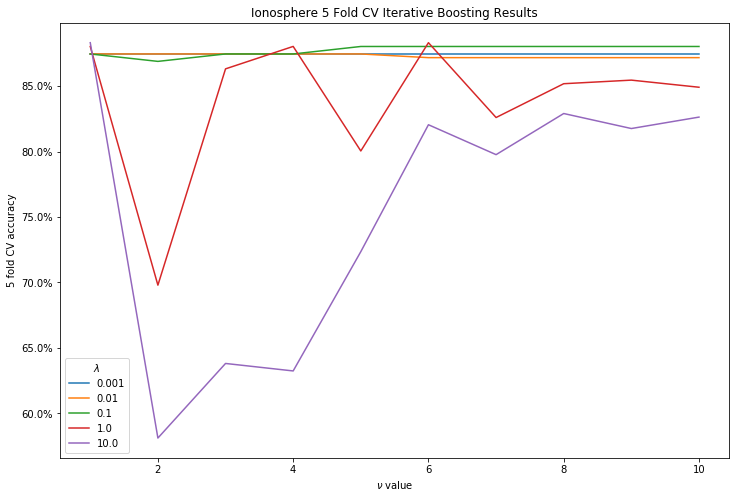

In [90]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in iterative_kernel_res_df.groupby('lambda_val'):
    ax.plot(df['nu_val'], df['accuracy']*100, label=lambda_val)

ax.legend(title=r'$\lambda$')
plt.title('Ionosphere 5 Fold CV Iterative Boosting Results')
plt.xlabel(r'$\nu$ value')
plt.ylabel('5 fold CV accuracy')
fig.savefig('images/ionosphere-ib.png', bbox_inches='tight')

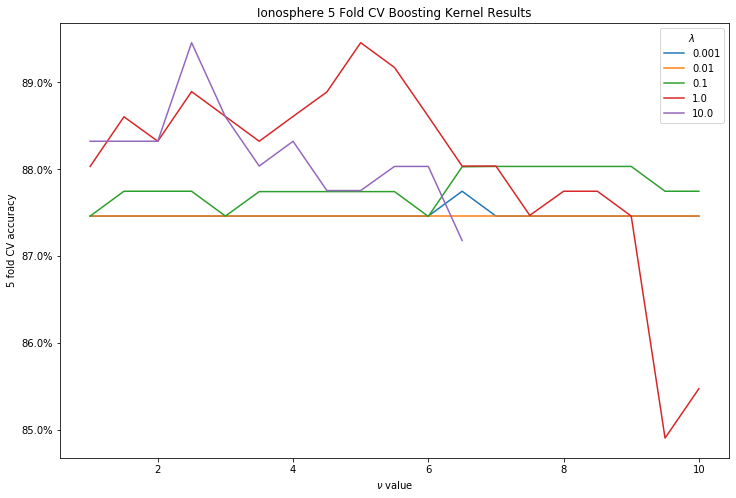

In [89]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in boosting_kernel_res_df.groupby('lambda_val'):
    ax.plot(df['nu_val'], df['accuracy']*100, label=lambda_val)

ax.legend(title=r'$\lambda$')
plt.title('Ionosphere 5 Fold CV Boosting Kernel Results')
plt.xlabel(r'$\nu$ value')
plt.ylabel('5 fold CV accuracy')
fig.savefig('images/ionosphere-kb.png', bbox_inches='tight')

Text(0, 0.5, '5 fold CV accuracy')

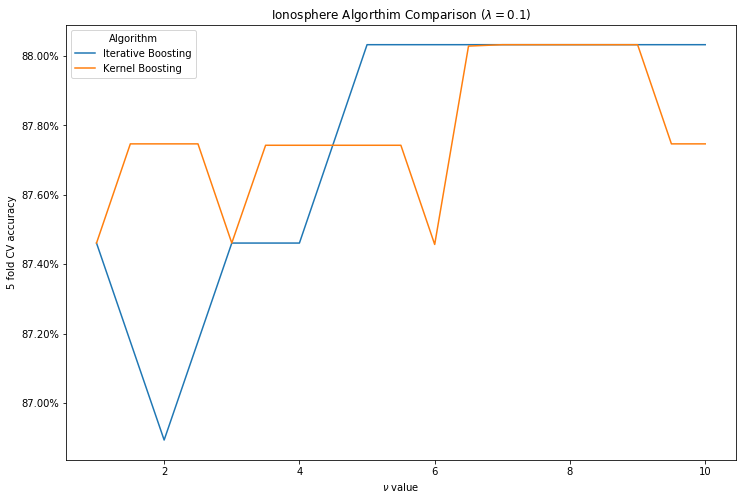

In [79]:
combined_ex_one_df = combined_df[combined_df.lambda_val==0.1]

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in combined_ex_one_df.groupby('Algo_Type'):
    ax.plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

ax.legend(title=r'Algorithm')
plt.title(r'Ionosphere Algorthim Comparison ($\lambda=0.1$)')
plt.xlabel(r'$\nu$ value')
plt.ylabel('5 fold CV accuracy')
fig.savefig('images/ionosphere-comp-1.png', bbox_inches='tight')

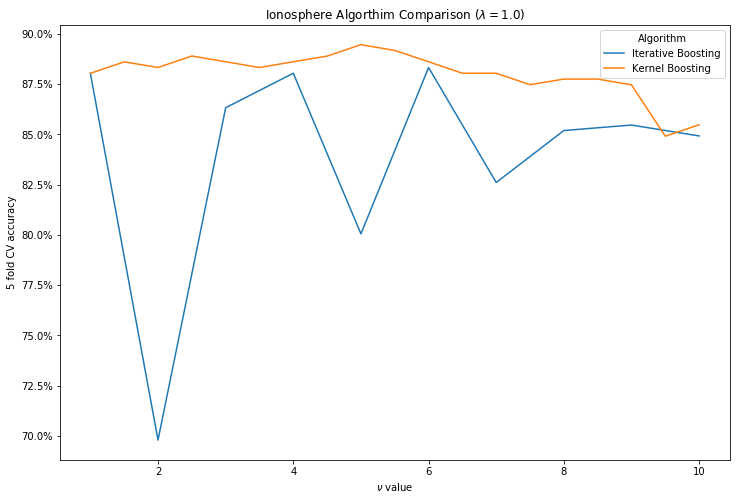

In [88]:
combined_ex_two_df = combined_df[combined_df.lambda_val==1.0]

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in combined_ex_two_df.groupby('Algo_Type'):
    ax.plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

ax.legend(title=r'Algorithm')
plt.title(r'Ionosphere Algorthim Comparison ($\lambda=1.0$)')
plt.xlabel(r'$\nu$ value')
plt.ylabel('5 fold CV accuracy')
fig.savefig('images/ionosphere-comp-2.png', bbox_inches='tight')

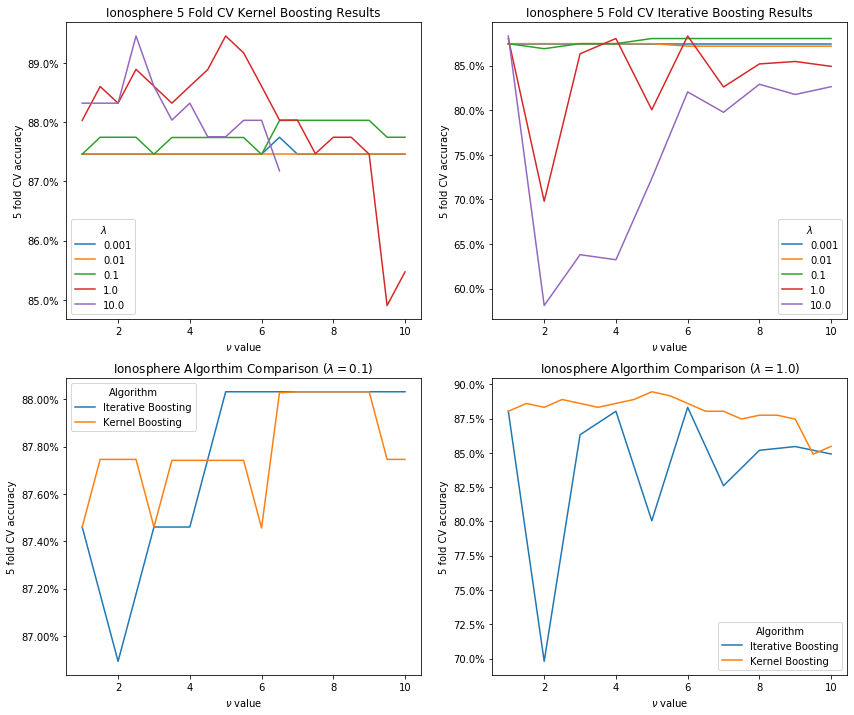

In [86]:
#fig = plt.figure(figsize=[12,8])
fig, axs = plt.subplots(2, 2, figsize=[14,12])

#
axs[0,0].yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in boosting_kernel_res_df.groupby('lambda_val'):
    axs[0,0].plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

axs[0,0].legend(title=r'$\lambda$')
axs[0,0].set_title('Ionosphere 5 Fold CV Kernel Boosting Results')
axs[0,0].set_xlabel(r'$\nu$ value')
axs[0,0].set_ylabel('5 fold CV accuracy')

#

#
axs[0,1].yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in iterative_kernel_res_df.groupby('lambda_val'):
    axs[0,1].plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

axs[0,1].legend(title=r'$\lambda$')
axs[0,1].set_title('Ionosphere 5 Fold CV Iterative Boosting Results')
axs[0,1].set_xlabel(r'$\nu$ value')
axs[0,1].set_ylabel('5 fold CV accuracy')

#
combined_ex_one_df = combined_df[combined_df.lambda_val==0.1]
axs[1,0].yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in combined_ex_one_df.groupby('Algo_Type'):
    axs[1,0].plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

axs[1,0].legend(title=r'Algorithm')
axs[1,0].set_title(r'Ionosphere Algorthim Comparison ($\lambda=0.1$)')
axs[1,0].set_xlabel(r'$\nu$ value')
axs[1,0].set_ylabel('5 fold CV accuracy')

#
combined_ex_two_df = combined_df[combined_df.lambda_val==1]
axs[1,1].yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in combined_ex_two_df.groupby('Algo_Type'):
    axs[1,1].plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

axs[1,1].legend(title=r'Algorithm')
axs[1,1].set_title(r'Ionosphere Algorthim Comparison ($\lambda=1.0$)')
axs[1,1].set_xlabel(r'$\nu$ value')
axs[1,1].set_ylabel('5 fold CV accuracy')
fig.savefig('images/ionosphere-all.png', bbox_inches='tight')

In [95]:
combined_df[combined_df.Algo_Type=='Iterative Boosting'].sort_values('accuracy').tail(10)

,accuracy,lambda_val,nu_val,Algo_Type
30,0.880322,1.0,1.0,Iterative Boosting
29,0.880322,0.1,10.0,Iterative Boosting
28,0.880322,0.1,9.0,Iterative Boosting
27,0.880322,0.1,8.0,Iterative Boosting
26,0.880322,0.1,7.0,Iterative Boosting
25,0.880322,0.1,6.0,Iterative Boosting
24,0.880322,0.1,5.0,Iterative Boosting
33,0.880362,1.0,4.0,Iterative Boosting
40,0.883219,10.0,1.0,Iterative Boosting
35,0.883219,1.0,6.0,Iterative Boosting
